Looking at how often do Nepal get run out - chink in the armour

In [117]:
import sqlite3
import pandas as pd
import os
import sys
import importlib

from pathlib import Path

# Add the Analytics_app directory to the Python path
root_dir = Path.cwd().parent.parent.parent
sys.path.append(str(root_dir / "Analytics_app"))

# Import the Ball_by_Ball class with reload to get latest changes
import data_cleaner
importlib.reload(data_cleaner)
from data_cleaner import Ball_by_Ball

data_dir = root_dir/"All data"/"T20_by_countries"/"Nepal"/"Database"

In [118]:
conn = sqlite3.connect(data_dir/'nepal_cricket.db')
cursor = conn.cursor()

# Initialize the Ball_by_Ball class with database connection for filtering
# Using dummy dataframe but passing the connection for filter operations
dummy_df = pd.DataFrame()
ball_processor = Ball_by_Ball(dummy_df, connection=conn)

In [119]:
df_2025 = ball_processor.filter.by_year('2025')


In [120]:
df_2025['cricinfo_match_id'].unique()

array(['1479320', '1479322', '1479325', '1479327', '1485939', '1485940',
       '1485941', '1485943', '1489968', '1489969', '1489970', '1503452',
       '1503457', '1503460', '1503463', '1503466', '1503470'],
      dtype=object)

In [121]:
# Apply filter by innings_number to get Nepal batting data and opponents batting data
team_of_interest = 'Nepal'

# Reload the module to get the fixed is_team_batting method
importlib.reload(data_cleaner)
from data_cleaner import Ball_by_Ball

# Recreate the ball_processor with the updated class
ball_processor = Ball_by_Ball(dummy_df, connection=conn)

# Use the corrected is_team_batting method from our Ball_by_Ball class (now with 0-based innings)
df_2025_nepal_bat = df_2025[df_2025.apply(lambda row: ball_processor.clean.is_team_batting(team_of_interest, row), axis=1)]

In [122]:
df_2025_nepal_bat

,id,match_id,cricinfo_match_id,innings_number,over_number,ball_in_over,batsman,bowler,non_striker,fielder,...,shot_area,is_drs,is_umpires_call,milestone_type,description,date,team_1_name,team_2_name,toss_winner_name,toss_decision
121,18484,3131,1479320,2,1,1,K Bhurtel,Muhammad Jabir,Aasif Sheikh,,...,,0,0,,,2025-04-09,Qatar,Nepal,Nepal,field
122,18485,3131,1479320,2,1,2,K Bhurtel,Muhammad Jabir,Aasif Sheikh,,...,,0,0,,,2025-04-09,Qatar,Nepal,Nepal,field
123,18486,3131,1479320,2,1,3,K Bhurtel,Muhammad Jabir,Aasif Sheikh,,...,,0,0,,,2025-04-09,Qatar,Nepal,Nepal,field
124,18487,3131,1479320,2,1,4,K Bhurtel,Muhammad Jabir,Aasif Sheikh,,...,,0,0,,,2025-04-09,Qatar,Nepal,Nepal,field
125,18488,3131,1479320,2,1,5,K Bhurtel,Muhammad Jabir,Aasif Sheikh,,...,,0,0,,,2025-04-09,Qatar,Nepal,Nepal,field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,22163,3526,1503470,1,20,2,Lokesh Bam,BF Mailata,RK Paudel,,...,,0,0,,,2025-10-17,Nepal,Samoa,Samoa,field
3801,22164,3526,1503470,1,20,3,Lokesh Bam,BF Mailata,RK Paudel,,...,,0,0,,,2025-10-17,Nepal,Samoa,Samoa,field
3802,22165,3526,1503470,1,20,4,RK Paudel,BF Mailata,Lokesh Bam,,...,,0,0,,,2025-10-17,Nepal,Samoa,Samoa,field
3803,22166,3526,1503470,1,20,5,Lokesh Bam,BF Mailata,RK Paudel,,...,,0,0,,,2025-10-17,Nepal,Samoa,Samoa,field


In [123]:
df_2025_nepal_bat['cricinfo_match_id'].unique()

array(['1479320', '1479322', '1479327', '1485939', '1485940', '1485941',
       '1485943', '1489968', '1489969', '1489970', '1503452', '1503457',
       '1503460', '1503463', '1503466', '1503470'], dtype=object)

In [124]:
df_2025_nepal_bat['dismissal_type'].value_counts()

dismissal_type
                     1829
caught                 56
bowled                 23
lbw                    14
run out                 9
caught and bowled       6
stumped                 2
retired hurt            1
Name: count, dtype: int64

16 runs outs inflicted in 16 matches, vs 9 run outs in 16 matches 

In [125]:
# get all run out dismissals for others when Nepal bowling in 2025
df_2025_nepal_runouts = df_2025_nepal_bat[df_2025_nepal_bat['dismissal_type'] == 'run out']
print(f"Nepal run outs in 2025 shape: {df_2025_nepal_runouts.shape}")

Nepal run outs in 2025 shape: (9, 33)


In [126]:
df_2025_nepal_runouts['cricinfo_match_id'].unique()

array(['1479327', '1485943', '1489969', '1489970', '1503452', '1503463',
       '1503466'], dtype=object)

In [127]:
# 7 matches , 9 run outs for Nepal
# Nepal run out matches count by matches
print(df_2025_nepal_runouts['cricinfo_match_id'].value_counts())
print(len(df_2025_nepal_runouts['cricinfo_match_id'].unique()))

cricinfo_match_id
1485943    2
1489970    2
1479327    1
1489969    1
1503452    1
1503463    1
1503466    1
Name: count, dtype: int64
7


In [128]:
df_2025_nepal_runouts.columns

Index(['id', 'match_id', 'cricinfo_match_id', 'innings_number', 'over_number',
       'ball_in_over', 'batsman', 'bowler', 'non_striker', 'fielder',
       'runs_batter', 'runs_extras', 'runs_total', 'is_wide', 'is_no_ball',
       'is_bye', 'is_leg_bye', 'is_legal_delivery', 'is_wicket',
       'dismissal_type', 'wicket_player_out', 'is_caught', 'ball_area',
       'shot_area', 'is_drs', 'is_umpires_call', 'milestone_type',
       'description', 'date', 'team_1_name', 'team_2_name', 'toss_winner_name',
       'toss_decision'],
      dtype='object')

In [129]:
run_outs_cols_subset = df_2025_nepal_runouts[['over_number','ball_in_over','wicket_player_out','dismissal_type','cricinfo_match_id', 'team_1_name','team_2_name']].reset_index()

In [130]:
run_outs_cols_subset

,index,over_number,ball_in_over,wicket_player_out,dismissal_type,cricinfo_match_id,team_1_name,team_2_name
0,715,11,2,Sompal Kami,run out,1479327,Kuwait,Nepal
1,1690,5,1,Aasif Sheikh,run out,1485943,Scotland,Nepal
2,1782,19,5,LN Rajbanshi,run out,1485943,Scotland,Nepal
3,2078,7,5,Kushal Malla,run out,1489969,Nepal,West Indies
4,2355,14,5,Gulsan Jha,run out,1489970,Nepal,West Indies
5,2372,17,2,Mohammad Aadil Alam,run out,1489970,Nepal,West Indies
6,2577,18,3,DS Airee,run out,1503452,Nepal,Kuwait
7,3311,20,6,Sompal Kami,run out,1503463,Nepal,Qatar
8,3558,20,6,NK Yadav,run out,1503466,Nepal,Oman


In [131]:
run_outs_cols_subset['batting_order']=''

In [ ]:
run_outs_cols_subset.loc[0, 'batting_order'] = 7 # Sompal vs Kuwait (loss)
run_outs_cols_subset.loc[1, 'batting_order'] = 2 # Aasif vs Scotland (loss)
run_outs_cols_subset.loc[2, 'batting_order'] = 11 #Lalit vs Scotland (same game as above)
run_outs_cols_subset.loc[3, 'batting_order'] = 4 # Kushal vs WI  (win)
run_outs_cols_subset.loc[4, 'batting_order'] = 4 # Jha vs WI (loss)
run_outs_cols_subset.loc[5, 'batting_order'] = 7 # Alam vs WI (same game as above)
run_outs_cols_subset.loc[6, 'batting_order'] = 6 #DS Airee vs Kuwait (Win)
run_outs_cols_subset.loc[7, 'batting_order'] = 9 # Sompal vs Qatar (Win)
run_outs_cols_subset.loc[8, 'batting_order'] = 10 #  Yadav v Oman (win)











In [153]:
matches_with_runouts

,id,match_id,cricinfo_match_id,innings_number,over_number,ball_in_over,batsman,bowler,non_striker,fielder,...,is_umpires_call,milestone_type,description,date_x,team_1_name,team_2_name,toss_winner_name,toss_decision,winner_name,date_y
0,19078,3193,1479327,2,11,2,Sompal Kami,NT Rajendran,Basir Ahamad,"[""Usman Patel"", ""Mohamed Shafeeq""]",...,0,,,2025-04-13,Kuwait,Nepal,Nepal,field,Kuwait,2025-04-13
1,20053,3253,1485943,2,5,1,RK Paudel,J Jarvis,Aasif Sheikh,"[""CM McBride""]",...,0,,,2025-06-20,Scotland,Nepal,Scotland,bat,Scotland,2025-06-20
2,20145,3253,1485943,2,19,5,Rupesh Singh,BJ McMullen,LN Rajbanshi,"[""HG Munsey"", ""BJ McMullen""]",...,0,,,2025-06-20,Scotland,Nepal,Scotland,bat,Scotland,2025-06-20
3,20441,3483,1489969,1,7,5,Aasif Sheikh,JO Holder,Kushal Malla,"[""JO Holder"", ""Z Motara""]",...,0,,,2025-09-29,Nepal,West Indies,Nepal,bat,Nepal,2025-09-29
4,20718,3488,1489970,1,14,5,S Jora,K Gore,Gulsan Jha,"[""K Gore"", ""AJ Hosein""]",...,0,,,2025-09-30,Nepal,West Indies,West Indies,field,West Indies,2025-09-30
5,20735,3488,1489970,1,17,2,S Jora,JO Holder,Mohammad Aadil Alam,"[""JO Holder"", ""AJ Hosein""]",...,0,,,2025-09-30,Nepal,West Indies,West Indies,field,West Indies,2025-09-30
6,20940,3507,1503452,1,18,3,K Bhurtel,A Chenthamara,DS Airee,"[""Usman Patel""]",...,0,,,2025-10-08,Nepal,Kuwait,Kuwait,field,Nepal,2025-10-08
7,21674,3519,1503463,1,20,6,Sompal Kami,Muhammad Asim,NK Yadav,"[""I Liyanage"", ""MM Baig""]",...,0,,,2025-10-13,Nepal,Qatar,Qatar,field,Nepal,2025-10-13
8,21921,3522,1503466,1,20,6,NK Yadav,J Ramanandi,Sompal Kami,"[""V Shukla"", ""J Ramanandi""]",...,0,,,2025-10-15,Nepal,Oman,Nepal,bat,Nepal,2025-10-15


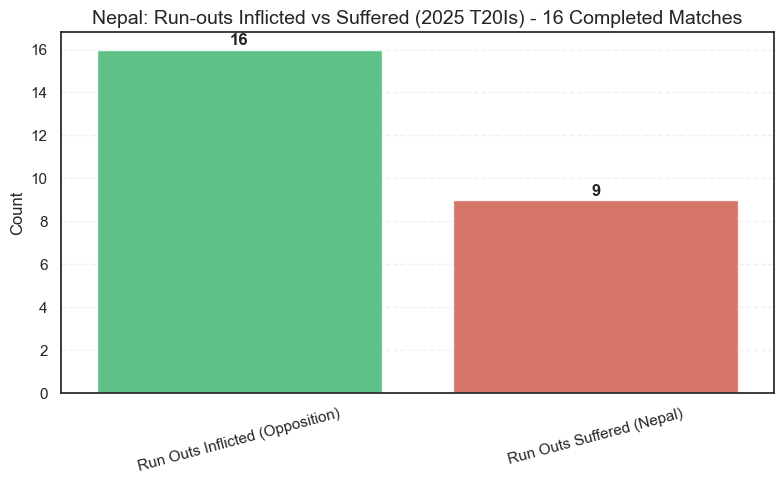

In [154]:
# Total run opposition run outs (inflicted ) vs Total run outs (experienced)
# 16 run outs and 9 run outs themselves
Opposition_run_outs = 16
Nepal_run_outs = 9

# Make a bar graph
import seaborn as sns
import matplotlib.pyplot as plt

# Data
labels = ['Run Outs Inflicted (Opposition)', 'Run Outs Suffered (Nepal)']
values = [16, 9]
colors = ['#2ecc71', '#e74c3c']   # green, red

plt.figure(figsize=(8, 5))
sns.set(style="white")

ax = sns.barplot(x=labels, y=values, palette=colors, alpha=0.85, hue = labels)

# Annotate values
for i, v in enumerate(values):
    ax.text(i, v + 0.05, str(v), 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels & Title
plt.ylabel("Count", fontsize=12)
plt.title("Nepal: Run-outs Inflicted vs Suffered (2025 T20Is) - 16 Completed Matches", fontsize=14)

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Transparent background
plt.gca().set_facecolor('none')
plt.gcf().patch.set_alpha(0)

plt.tight_layout()
plt.savefig("/Users/saral/Documents/cricket/cricket_gardens/Articles/Nepal and run outs/output/run_out_comparision.png", 
            transparent=True, dpi=300, bbox_inches='tight')
plt.show()


In [134]:
df_2025_nepal_runouts.groupby(['wicket_player_out','cricinfo_match_id'])['dismissal_type'].value_counts()

wicket_player_out    cricinfo_match_id  dismissal_type
Aasif Sheikh         1485943            run out           1
DS Airee             1503452            run out           1
Gulsan Jha           1489970            run out           1
Kushal Malla         1489969            run out           1
LN Rajbanshi         1485943            run out           1
Mohammad Aadil Alam  1489970            run out           1
NK Yadav             1503466            run out           1
Sompal Kami          1479327            run out           1
                     1503463            run out           1
Name: count, dtype: int64

Aasif Sheikh    1 - pos 2  - 1485943 (Scotland)
Aasif Sheikh    1 - pos 11  - 1485943 (Scotland)



In [135]:
# batsmen run out
df_2025_nepal_runouts['wicket_player_out'].value_counts()

wicket_player_out
Sompal Kami            2
Aasif Sheikh           1
LN Rajbanshi           1
Kushal Malla           1
Gulsan Jha             1
Mohammad Aadil Alam    1
DS Airee               1
NK Yadav               1
Name: count, dtype: int64

In [136]:
df_2025_nepal_runouts

,id,match_id,cricinfo_match_id,innings_number,over_number,ball_in_over,batsman,bowler,non_striker,fielder,...,shot_area,is_drs,is_umpires_call,milestone_type,description,date,team_1_name,team_2_name,toss_winner_name,toss_decision
715,19078,3193,1479327,2,11,2,Sompal Kami,NT Rajendran,Basir Ahamad,"[""Usman Patel"", ""Mohamed Shafeeq""]",...,,0,0,,,2025-04-13,Kuwait,Nepal,Nepal,field
1690,20053,3253,1485943,2,5,1,RK Paudel,J Jarvis,Aasif Sheikh,"[""CM McBride""]",...,,0,0,,,2025-06-20,Scotland,Nepal,Scotland,bat
1782,20145,3253,1485943,2,19,5,Rupesh Singh,BJ McMullen,LN Rajbanshi,"[""HG Munsey"", ""BJ McMullen""]",...,,0,0,,,2025-06-20,Scotland,Nepal,Scotland,bat
2078,20441,3483,1489969,1,7,5,Aasif Sheikh,JO Holder,Kushal Malla,"[""JO Holder"", ""Z Motara""]",...,,0,0,,,2025-09-29,Nepal,West Indies,Nepal,bat
2355,20718,3488,1489970,1,14,5,S Jora,K Gore,Gulsan Jha,"[""K Gore"", ""AJ Hosein""]",...,,0,0,,,2025-09-30,Nepal,West Indies,West Indies,field
2372,20735,3488,1489970,1,17,2,S Jora,JO Holder,Mohammad Aadil Alam,"[""JO Holder"", ""AJ Hosein""]",...,,0,0,,,2025-09-30,Nepal,West Indies,West Indies,field
2577,20940,3507,1503452,1,18,3,K Bhurtel,A Chenthamara,DS Airee,"[""Usman Patel""]",...,,0,0,,,2025-10-08,Nepal,Kuwait,Kuwait,field
3311,21674,3519,1503463,1,20,6,Sompal Kami,Muhammad Asim,NK Yadav,"[""I Liyanage"", ""MM Baig""]",...,,0,0,,,2025-10-13,Nepal,Qatar,Qatar,field
3558,21921,3522,1503466,1,20,6,NK Yadav,J Ramanandi,Sompal Kami,"[""V Shukla"", ""J Ramanandi""]",...,,0,0,,,2025-10-15,Nepal,Oman,Nepal,bat


In [137]:
df_2025_nepal_runouts.groupby(['batsman'])['cricinfo_match_id'].value_counts()

batsman       cricinfo_match_id
Aasif Sheikh  1489969              1
K Bhurtel     1503452              1
NK Yadav      1503466              1
RK Paudel     1485943              1
Rupesh Singh  1485943              1
S Jora        1489970              2
Sompal Kami   1479327              1
              1503463              1
Name: count, dtype: int64

In [ ]:
# Win loss ratio, merge the match summary data with run outs data
cursor.execute("""SELECT * FROM matches WHERE strftime('%Y', date) = '2025' AND gender = 'male'""")

rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(rows, columns=columns)
df.head()


In [149]:
df_2025_nepal_runouts.columns

Index(['id', 'match_id', 'cricinfo_match_id', 'innings_number', 'over_number',
       'ball_in_over', 'batsman', 'bowler', 'non_striker', 'fielder',
       'runs_batter', 'runs_extras', 'runs_total', 'is_wide', 'is_no_ball',
       'is_bye', 'is_leg_bye', 'is_legal_delivery', 'is_wicket',
       'dismissal_type', 'wicket_player_out', 'is_caught', 'ball_area',
       'shot_area', 'is_drs', 'is_umpires_call', 'milestone_type',
       'description', 'date', 'team_1_name', 'team_2_name', 'toss_winner_name',
       'toss_decision'],
      dtype='object')

In [152]:

# the source_file column has xxxxxxx.json , remove the .json and create cricinfo_match_id column in df
df['cricinfo_match_id'] = df['source_file'].str.replace('.json', '', regex=False)

# df_winner = df[["source_file","winner_name"]]

# Merge to get match details for games with run outs
matches_with_runouts = pd.merge(
    df_2025_nepal_runouts,
    df[['cricinfo_match_id', 'winner_name', 'date']],
    on='cricinfo_match_id',
    how='left'
)

print(f"Matches with run outs: {len(matches_with_runouts)}")
matches_with_runouts

Matches with run outs: 9


,id,match_id,cricinfo_match_id,innings_number,over_number,ball_in_over,batsman,bowler,non_striker,fielder,...,is_umpires_call,milestone_type,description,date_x,team_1_name,team_2_name,toss_winner_name,toss_decision,winner_name,date_y
0,19078,3193,1479327,2,11,2,Sompal Kami,NT Rajendran,Basir Ahamad,"[""Usman Patel"", ""Mohamed Shafeeq""]",...,0,,,2025-04-13,Kuwait,Nepal,Nepal,field,Kuwait,2025-04-13
1,20053,3253,1485943,2,5,1,RK Paudel,J Jarvis,Aasif Sheikh,"[""CM McBride""]",...,0,,,2025-06-20,Scotland,Nepal,Scotland,bat,Scotland,2025-06-20
2,20145,3253,1485943,2,19,5,Rupesh Singh,BJ McMullen,LN Rajbanshi,"[""HG Munsey"", ""BJ McMullen""]",...,0,,,2025-06-20,Scotland,Nepal,Scotland,bat,Scotland,2025-06-20
3,20441,3483,1489969,1,7,5,Aasif Sheikh,JO Holder,Kushal Malla,"[""JO Holder"", ""Z Motara""]",...,0,,,2025-09-29,Nepal,West Indies,Nepal,bat,Nepal,2025-09-29
4,20718,3488,1489970,1,14,5,S Jora,K Gore,Gulsan Jha,"[""K Gore"", ""AJ Hosein""]",...,0,,,2025-09-30,Nepal,West Indies,West Indies,field,West Indies,2025-09-30
5,20735,3488,1489970,1,17,2,S Jora,JO Holder,Mohammad Aadil Alam,"[""JO Holder"", ""AJ Hosein""]",...,0,,,2025-09-30,Nepal,West Indies,West Indies,field,West Indies,2025-09-30
6,20940,3507,1503452,1,18,3,K Bhurtel,A Chenthamara,DS Airee,"[""Usman Patel""]",...,0,,,2025-10-08,Nepal,Kuwait,Kuwait,field,Nepal,2025-10-08
7,21674,3519,1503463,1,20,6,Sompal Kami,Muhammad Asim,NK Yadav,"[""I Liyanage"", ""MM Baig""]",...,0,,,2025-10-13,Nepal,Qatar,Qatar,field,Nepal,2025-10-13
8,21921,3522,1503466,1,20,6,NK Yadav,J Ramanandi,Sompal Kami,"[""V Shukla"", ""J Ramanandi""]",...,0,,,2025-10-15,Nepal,Oman,Nepal,bat,Nepal,2025-10-15


In [158]:
matches_with_runouts['winner_name'].value_counts().unique()

array([4, 2, 1])

/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_21999/4226241585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_matches['result_group'] = unique_matches['winner_name'].apply(


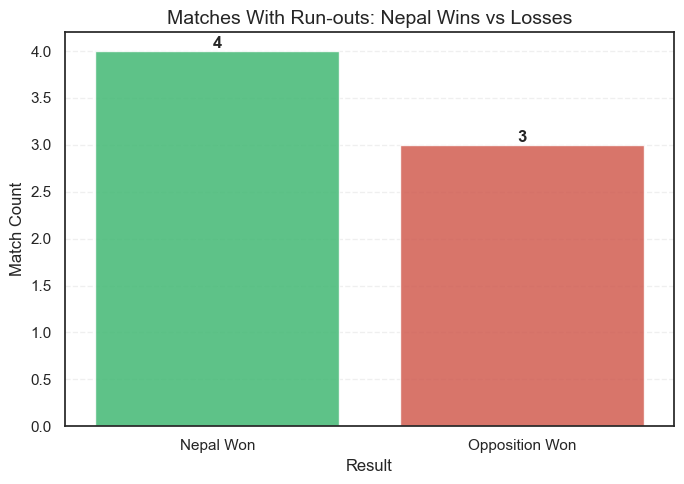

In [164]:


# 1. Drop duplicates so each match is counted only once
unique_matches = matches_with_runouts.drop_duplicates(subset=['cricinfo_match_id'])

# 2. Create winner categories (Nepal vs Others)
unique_matches['result_group'] = unique_matches['winner_name'].apply(
    lambda x: 'Nepal Won' if x == 'Nepal' else 'Opposition Won'
)

# 3. Count
result_counts = unique_matches['result_group'].value_counts()
# labels
labels = ['Nepal Won','Opposition Won']
# 4. Plot
plt.figure(figsize=(7,5))
sns.set(style="white")


colors = ['#2ecc71', '#e74c3c']  # green = Nepal win, red = loss

ax = sns.barplot(
    x=result_counts.index,
    y=result_counts.values,
    palette=colors, hue = labels,
    alpha=0.85
)

# Add annotations
for i, v in enumerate(result_counts.values):
    ax.text(i, v + 0.0, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Matches With Run-outs: Nepal Wins vs Losses", fontsize=14)
plt.ylabel("Match Count")
plt.xlabel("Result")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Transparent background
ax.set_facecolor('none')
plt.gcf().patch.set_alpha(0)

plt.tight_layout()
plt.savefig("/Users/saral/Documents/cricket/cricket_gardens/Articles/Nepal and run outs/output/when_run_out_who_won.png", 
            transparent=True, dpi=300, bbox_inches='tight')
plt.show()


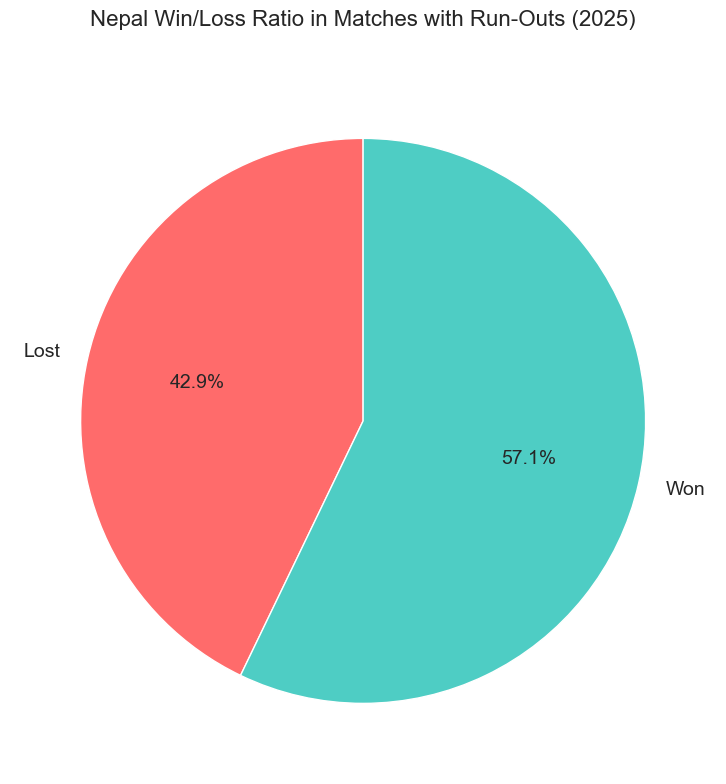

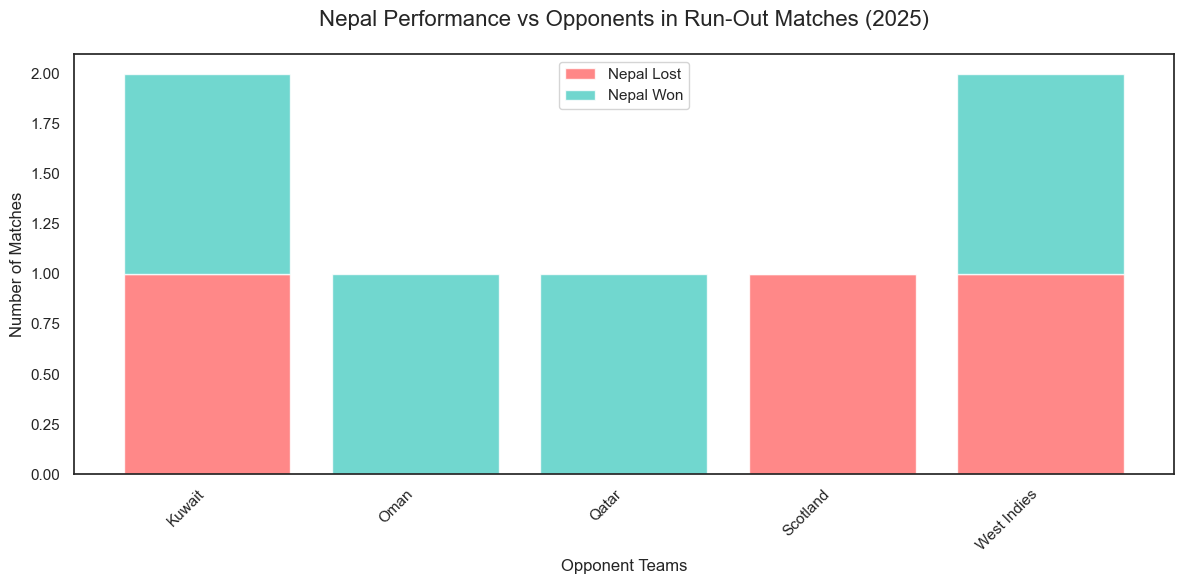


Summary Statistics:
Total matches with run-outs: 7
Nepal wins in run-out matches: 4
Nepal losses in run-out matches: 3
Nepal win rate in matches with run-outs: 57.1%

Opponent breakdown:
opponent
Kuwait         2
West Indies    2
Scotland       1
Qatar          1
Oman           1
Name: count, dtype: int64


In [167]:
# lets visualize Nepal's win from matches_with_runouts
import matplotlib.pyplot as plt
import seaborn as sns

matches_with_runouts = matches_with_runouts.drop_duplicates(subset=['cricinfo_match_id'])


# Create a win/loss indicator for Nepal
matches_with_runouts['nepal_won'] = matches_with_runouts['winner_name'] == 'Nepal'

# Count wins vs losses in matches with run-outs
win_loss_counts = matches_with_runouts['nepal_won'].value_counts()
win_loss_labels = ['Lost', 'Won'] if False in win_loss_counts.index else ['Won']
win_loss_values = [win_loss_counts[False], win_loss_counts[True]] if False in win_loss_counts.index else [win_loss_counts[True]]

# IMAGE 1: Pie chart for win/loss ratio in run-out matches
plt.figure(figsize=(8, 8))
colors = ['#FF6B6B', '#4ECDC4'] if len(win_loss_values) == 2 else ['#4ECDC4']
wedges, texts, autotexts = plt.pie(
    win_loss_values, 
    labels=win_loss_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={ 'fontsize': 14}
)

plt.title('Nepal Win/Loss Ratio in Matches with Run-Outs (2025)', 
           fontsize=16, pad=30)

# Style the plot
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

plt.tight_layout()
plt.savefig("/Users/saral/Documents/cricket/cricket_gardens/Articles/Nepal and run outs/output/nepal_wins_pie_chart_when_run_out.png", 
            transparent=True, dpi=300, bbox_inches='tight', facecolor='none')
plt.show()

# IMAGE 2: Bar chart showing opponents in run-out matches with win/loss
opponent_wins = []
for _, row in matches_with_runouts.iterrows():
    if row['team_1_name'] == 'Nepal':
        opponent = row['team_2_name']
    else:
        opponent = row['team_1_name']
    opponent_wins.append({
        'opponent': opponent,
        'nepal_won': row['nepal_won']
    })

opponent_df = pd.DataFrame(opponent_wins)
opponent_summary = opponent_df.groupby(['opponent', 'nepal_won']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

# Create stacked bar chart
if True in opponent_summary.columns and False in opponent_summary.columns:
    plt.bar(opponent_summary.index, opponent_summary[False], 
           label='Nepal Lost', color='#FF6B6B', alpha=0.8)
    plt.bar(opponent_summary.index, opponent_summary[True], 
           bottom=opponent_summary[False], label='Nepal Won', color='#4ECDC4', alpha=0.8)
elif True in opponent_summary.columns:
    plt.bar(opponent_summary.index, opponent_summary[True], 
           label='Nepal Won', color='#4ECDC4', alpha=0.8)
else:
    plt.bar(opponent_summary.index, opponent_summary[False], 
           label='Nepal Lost', color='#FF6B6B', alpha=0.8)

plt.title('Nepal Performance vs Opponents in Run-Out Matches (2025)', fontsize=16, pad=20)
plt.xlabel('Opponent Teams', fontsize=12)
plt.ylabel('Number of Matches',  fontsize=12)
# plt.tick_params(colors='white')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Style the plot
plt.gca().set_facecolor('none')
plt.gcf().patch.set_facecolor('none')

plt.tight_layout()
plt.savefig("/Users/saral/Documents/cricket/cricket_gardens/Articles/Nepal and run outs/output/nepal_vs_opponents_bar_chart_when_run_out.png", 
            transparent=True, dpi=300, bbox_inches='tight', facecolor='none')
plt.show()

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"Total matches with run-outs: {len(matches_with_runouts)}")
print(f"Nepal wins in run-out matches: {sum(matches_with_runouts['nepal_won'])}")
print(f"Nepal losses in run-out matches: {sum(~matches_with_runouts['nepal_won'])}")
if len(matches_with_runouts) > 0:
    win_rate = (sum(matches_with_runouts['nepal_won']) / len(matches_with_runouts)) * 100
    print(f"Nepal win rate in matches with run-outs: {win_rate:.1f}%")

print(f"\nOpponent breakdown:")
print(opponent_df['opponent'].value_counts())

In [183]:
def categorize_order(pos):
    if 1 <= pos <= 3:
        return "Top Order"
    elif 4 <= pos <= 6:
        return "Middle Order"
    elif 7 <= pos <= 8:
        return "Lower Middle Order"
    elif 9 <= pos <= 11:
        return "Lower Order"
    else:
        return "Unknown"
        
run_outs_cols_subset['order_group'] = run_outs_cols_subset['batting_order'].apply(categorize_order)


order_counts = run_outs_cols_subset['order_group'].value_counts()
order_counts

order_group
Lower Order           3
Middle Order          3
Lower Middle Order    2
Top Order             1
Name: count, dtype: int64

/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_21999/2161059232.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_21999/2161059232.py:5: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


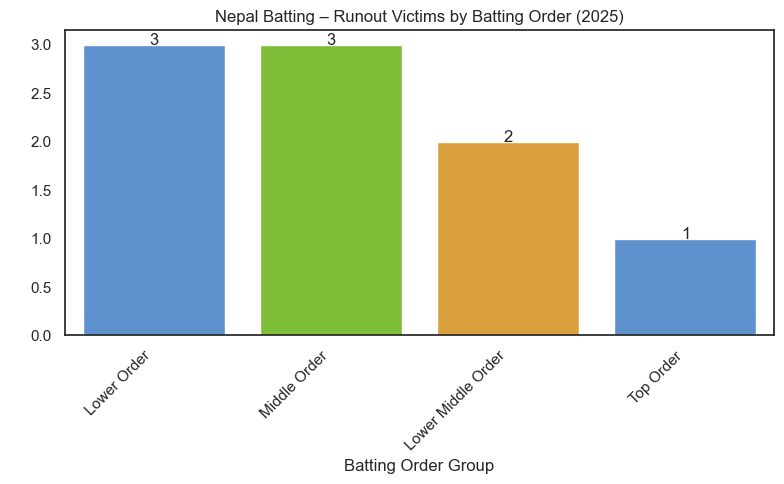

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=order_counts.index,
    y=order_counts.values,
    palette=["#4A90E2", "#7ED321", "#F5A623"]  # Top/Middle/Lower colors
)

plt.title("Nepal Batting – Runout Victims by Batting Order (2025)")
plt.xlabel("Batting Order Group")
plt.ylabel("Runouts", color = 'white')
plt.xticks(rotation=45, ha='right')


# Add value labels
for i, val in enumerate(order_counts.values):
    plt.text(i, val + 0.0, str(val), ha='center', fontsize=12)
plt.savefig("/Users/saral/Documents/cricket/cricket_gardens/Articles/Nepal and run outs/output/run_out_by_player_orde_when_run_out.png", 
            transparent=True, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [186]:
# lastly where in the game did the run out happen
run_outs_cols_subset

,index,over_number,ball_in_over,wicket_player_out,dismissal_type,cricinfo_match_id,team_1_name,team_2_name,batting_order,order_group
0,715,11,2,Sompal Kami,run out,1479327,Kuwait,Nepal,7,Lower Middle Order
1,1690,5,1,Aasif Sheikh,run out,1485943,Scotland,Nepal,2,Top Order
2,1782,19,5,LN Rajbanshi,run out,1485943,Scotland,Nepal,11,Lower Order
3,2078,7,5,Kushal Malla,run out,1489969,Nepal,West Indies,4,Middle Order
4,2355,14,5,Gulsan Jha,run out,1489970,Nepal,West Indies,4,Middle Order
5,2372,17,2,Mohammad Aadil Alam,run out,1489970,Nepal,West Indies,7,Lower Middle Order
6,2577,18,3,DS Airee,run out,1503452,Nepal,Kuwait,6,Middle Order
7,3311,20,6,Sompal Kami,run out,1503463,Nepal,Qatar,9,Lower Order
8,3558,20,6,NK Yadav,run out,1503466,Nepal,Oman,10,Lower Order


In [200]:
def overs_order(overs):
    if 0 <= overs < 6:
        return "Powerplay"
    elif 6 <= overs <= 15:
        return "Middle Overs"
    elif overs > 15:
        return "Death Overs"
    else:
        return "Unknown"

In [201]:
run_outs_cols_subset['bowling_overs'] = run_outs_cols_subset['over_number'].apply(overs_order)


In [203]:
order_counts = run_outs_cols_subset['bowling_overs'].value_counts()
order_counts

bowling_overs
Death Overs     5
Middle Overs    3
Powerplay       1
Name: count, dtype: int64

/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_21999/2952404994.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


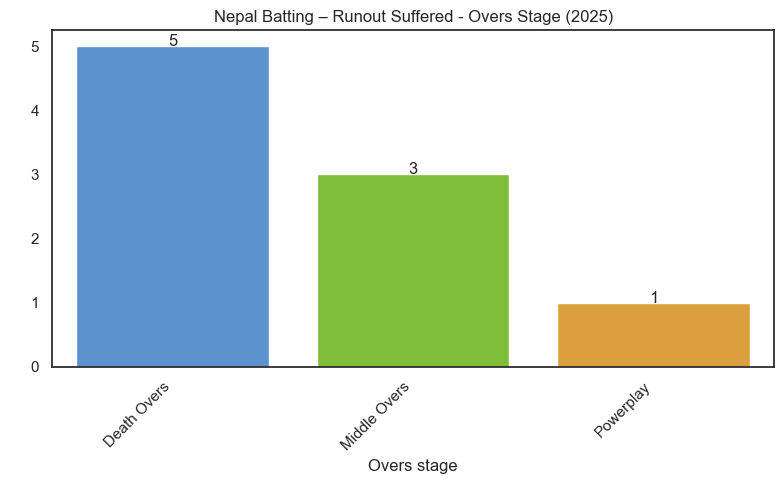

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=order_counts.index,
    y=order_counts.values,
    palette=["#4A90E2", "#7ED321", "#F5A623"]  # Top/Middle/Lower colors
)

plt.title("Nepal Batting – Runout Suffered - Overs Stage (2025)")
plt.xlabel("Overs stage")
plt.ylabel("Runouts", color = 'white')
plt.xticks(rotation=45, ha='right')


# Add value labels
for i, val in enumerate(order_counts.values):
    plt.text(i, val + 0.0, str(val), ha='center', fontsize=12)
plt.savefig("/Users/saral/Documents/cricket/cricket_gardens/Articles/Nepal and run outs/output/run_out_by_overs_stage_when_run_out.png", 
            transparent=True, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
